<a href="https://colab.research.google.com/github/MariiaS/from_shallow_to_deeplearning/blob/main/Second_Project_Mariia_Solodiankina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Please use the link https://colab.research.google.com/drive/1wtIo-Mh7_WzN9lB7TMBeS9cbxlFWNwcm?usp=sharing for the most recent version of the notebook.



In order to retrieve easily annotations here are some extra information you can use:



```
annotation_path = path+"/VOCdevkit/VOC2007/ImageSets/Main/"
print(os.listdir(annotation_path))
['train.txt', 'val.txt', 'trainval.txt', 'bicycle_train.txt', 'bicycle_val.txt', 'bicycle_trainval.txt', 'aeroplane_trainval.txt', 'aeroplane_val.txt', 'aeroplane_train.txt', 'boat_val.txt', 'bird_train.txt', 'bird_val.txt', 'bird_trainval.txt', 'boat_train.txt', 'boat_trainval.txt', 'bottle_val.txt', 'bottle_train.txt', 'bus_val.txt', 'bottle_trainval.txt', 'bus_train.txt', 'bus_trainval.txt', 'cat_train.txt', 'cat_trainval.txt', 'car_trainval.txt', 'car_val.txt', 'cat_val.txt', 'car_train.txt', 'cow_train.txt', 'cow_val.txt', 'cow_trainval.txt', 'chair_trainval.txt', 'chair_val.txt', 'chair_train.txt', 'diningtable_train.txt', 'diningtable_val.txt', 'dog_val.txt', 'diningtable_trainval.txt', 'dog_trainval.txt', 'dog_train.txt', 'horse_val.txt', 'horse_train.txt', 'horse_trainval.txt', 'motorbike_trainval.txt', 'person_trainval.txt', 'motorbike_val.txt', 'person_train.txt', 'motorbike_train.txt', 'person_val.txt', 'sheep_train.txt', 'pottedplant_val.txt', 'pottedplant_trainval.txt', 'sheep_val.txt', 'pottedplant_train.txt', 'sheep_trainval.txt', 'sofa_train.txt', 'train_trainval.txt', 'sofa_trainval.txt', 'train_val.txt', 'train_train.txt', 'sofa_val.txt', 'tvmonitor_train.txt', 'tvmonitor_val.txt', 'tvmonitor_trainval.txt']
```



In each of these files, you have the list of images belonging to train set, validation set, or both, and +1 or -1 depending on if the category (from the name of the txt file) is present or not in eahc image.

Then the corresponding images are in:



```
image_path = path+"/VOCdevkit/VOC2007/JPEGImages/"
print(os.listdir(image_path))
```


**First Task: Extend Near Duplicate to Classification
With your results of the previous project, try to find an optimal threshold to retrieve all the images of a given category.**

Try to do this for several categories.

In [ ]:
import os
import numpy as np
import pandas as pd
import torchvision.datasets as datasets
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 25.0MB 139kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 30.6MB 111kB/s 


In [ ]:
path = "/content/drive/MyDrive/Study/From Shallow to Deep Learning/VOC2007"
os.chdir(path)
os.listdir(path)

['VOCtrainval_06-Nov-2007.tar',
 'VOCtest_06-Nov-2007.tar',
 'VOCdevkit',
 'VOCtrainval_06-Nov-2007.tar (Unzipped Files)']

In [ ]:
annotation_path = path+"/VOCdevkit/VOC2007/ImageSets/Main/"
print(os.listdir(annotation_path))

['train.txt', 'val.txt', 'trainval.txt', 'bicycle_train.txt', 'bicycle_val.txt', 'bicycle_trainval.txt', 'aeroplane_trainval.txt', 'aeroplane_val.txt', 'aeroplane_train.txt', 'boat_val.txt', 'bird_train.txt', 'bird_val.txt', 'bird_trainval.txt', 'boat_train.txt', 'boat_trainval.txt', 'bottle_val.txt', 'bottle_train.txt', 'bus_val.txt', 'bottle_trainval.txt', 'bus_train.txt', 'bus_trainval.txt', 'cat_train.txt', 'cat_trainval.txt', 'car_trainval.txt', 'car_val.txt', 'cat_val.txt', 'car_train.txt', 'cow_train.txt', 'cow_val.txt', 'cow_trainval.txt', 'chair_trainval.txt', 'chair_val.txt', 'chair_train.txt', 'diningtable_train.txt', 'diningtable_val.txt', 'dog_val.txt', 'diningtable_trainval.txt', 'dog_trainval.txt', 'dog_train.txt', 'horse_val.txt', 'horse_train.txt', 'horse_trainval.txt', 'motorbike_trainval.txt', 'person_trainval.txt', 'motorbike_val.txt', 'person_train.txt', 'motorbike_train.txt', 'person_val.txt', 'sheep_train.txt', 'pottedplant_val.txt', 'pottedplant_trainval.txt', '

In [ ]:
image_path = path+"/VOCdevkit/VOC2007/JPEGImages/"
print(os.listdir(image_path))

['009868.jpg', '001441.jpg', '002598.jpg', '001901.jpg', '005773.jpg', '003588.jpg', '008655.jpg', '000579.jpg', '005991.jpg', '008841.jpg', '000448.jpg', '000269.jpg', '005761.jpg', '006038.jpg', '007141.jpg', '002186.jpg', '001899.jpg', '006578.jpg', '003988.jpg', '003408.jpg', '000868.jpg', '008948.jpg', '005397.jpg', '005104.jpg', '007390.jpg', '006849.jpg', '006930.jpg', '007923.jpg', '008997.jpg', '007702.jpg', '008557.jpg', '004984.jpg', '003907.jpg', '004137.jpg', '003743.jpg', '000109.jpg', '005186.jpg', '008282.jpg', '008076.jpg', '001231.jpg', '002962.jpg', '008783.jpg', '003056.jpg', '002645.jpg', '007344.jpg', '004369.jpg', '003202.jpg', '007996.jpg', '007359.jpg', '002820.jpg', '009048.jpg', '002989.jpg', '003120.jpg', '004929.jpg', '008874.jpg', '004364.jpg', '004100.jpg', '007212.jpg', '001027.jpg', '006339.jpg', '002368.jpg', '005378.jpg', '004792.jpg', '004718.jpg', '008365.jpg', '007909.jpg', '003300.jpg', '003837.jpg', '009613.jpg', '003236.jpg', '004562.jpg', '0089

First, I want to collect 4 different categories: cats, dogs, birds and horses 

In [ ]:
cats_df = pd.read_csv(annotation_path+ "/cat_trainval.txt", sep="\s+", header=None, dtype="string", names=['image','present'] )
cats_df['category'] = 'cat'

In [ ]:
annotation_df = cats_df[cats_df.present == '1']
annotation_df.head

<bound method NDFrame.head of        image present category
6     000019       1      cat
21    000044       1      cat
36    000077       1      cat
44    000099       1      cat
54    000118       1      cat
...      ...     ...      ...
4938  009819       1      cat
4955  009852       1      cat
4976  009886       1      cat
4979  009896       1      cat
4992  009923       1      cat

[337 rows x 3 columns]>

In [ ]:
horses_df = pd.read_csv(annotation_path+ "/horse_trainval.txt", sep="\s+", header=None, dtype="string", names=['image','present'] )
horses_df['category'] = 'horse'
horses_df = horses_df[horses_df.present == '1']
annotation_df = annotation_df.append(horses_df)
annotation_df.head

<bound method NDFrame.head of        image present category
6     000019       1      cat
21    000044       1      cat
36    000077       1      cat
44    000099       1      cat
54    000118       1      cat
...      ...     ...      ...
4933  009808       1    horse
4950  009841       1    horse
4954  009851       1    horse
4968  009874       1    horse
5006  009954       1    horse

[624 rows x 3 columns]>

In [ ]:
dogs_df = pd.read_csv(annotation_path+ "/dog_trainval.txt", sep="\s+", header=None, dtype="string", names=['image','present'] )
dogs_df['category'] = 'dog'
dogs_df = dogs_df[dogs_df.present == '1']
annotation_df = annotation_df.append(dogs_df)
annotation_df.head

<bound method NDFrame.head of        image present category
6     000019       1      cat
21    000044       1      cat
36    000077       1      cat
44    000099       1      cat
54    000118       1      cat
...      ...     ...      ...
4928  009797       1      dog
4940  009823       1      dog
4966  009870       1      dog
4990  009918       1      dog
5010  009961       1      dog

[1045 rows x 3 columns]>

In [ ]:
birds_df = pd.read_csv(annotation_path+ "/bird_trainval.txt", sep="\s+", header=None, dtype="string", names=['image','present'] )
birds_df['category'] = 'bird'
birds_df = birds_df[birds_df.present == '1']
annotation_df = annotation_df.append(birds_df)
annotation_df.head

<bound method NDFrame.head of        image present category
6     000019       1      cat
21    000044       1      cat
36    000077       1      cat
44    000099       1      cat
54    000118       1      cat
...      ...     ...      ...
4872  009692       1     bird
4905  009749       1     bird
4929  009800       1     bird
4986  009908       1     bird
4998  009940       1     bird

[1375 rows x 3 columns]>

Drop duplicated images 

In [ ]:
annotation_df.drop_duplicates(subset ="image", 
                     keep = False, inplace = True)
annotation_df.head

<bound method NDFrame.head of        image present category
6     000019       1      cat
21    000044       1      cat
36    000077       1      cat
44    000099       1      cat
54    000118       1      cat
...      ...     ...      ...
4872  009692       1     bird
4905  009749       1     bird
4929  009800       1     bird
4986  009908       1     bird
4998  009940       1     bird

[1341 rows x 3 columns]>

I'm sorting images by the name to get them in the same order as they are in the folder

In [ ]:
annotation_df = annotation_df.sort_values(by=['image'])
annotation_df.head

<bound method NDFrame.head of        image present category
2     000009       1    horse
5     000017       1    horse
6     000019       1      cat
8     000021       1      dog
17    000036       1      dog
...      ...     ...      ...
4990  009918       1      dog
4992  009923       1      cat
4998  009940       1     bird
5006  009954       1    horse
5010  009961       1      dog

[1341 rows x 3 columns]>

As a result, I'm getting the list of all image names in given 4 categories in the needed format.

In [ ]:
images_annotations = (annotation_df.image.values + ".jpg")
print(images_annotations)

<StringArray>
['000009.jpg', '000017.jpg', '000019.jpg', '000021.jpg', '000036.jpg',
 '000044.jpg', '000046.jpg', '000048.jpg', '000063.jpg', '000064.jpg',
 ...
 '009870.jpg', '009874.jpg', '009886.jpg', '009896.jpg', '009908.jpg',
 '009918.jpg', '009923.jpg', '009940.jpg', '009954.jpg', '009961.jpg']
Length: 1341, dtype: string


Here I'm starting to use cv2 to find the matches as we did in project 1

In [ ]:
import cv2

I'm taking some random animal from the dataset, find its keypoints and descriptors and will try to find all other animals in the same category

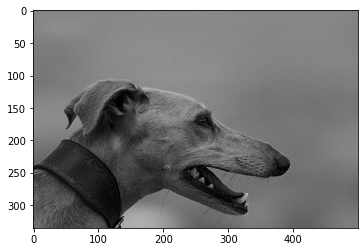

In [ ]:
image = cv2.imread(image_path + images_annotations[10])
plt.imshow(image)
plt.show()

Testing the function which will help to find descriptors and keypoints of the given image

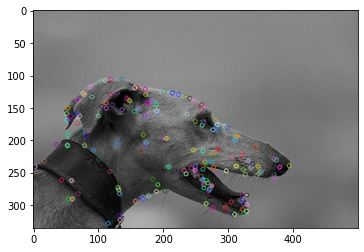

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
def keypoints_detect(img, instance):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  kp, des = instance.detectAndCompute(gray,None) 
  img = cv2.drawKeypoints(gray,kp,img, flags = 2)
  return kp, des
test = np.array(image)
keypoints_detect(test, sift)
plt.imshow(test)

In [ ]:
image_final = cv2.imread(image_path + images_annotations[10])
gray = cv2.cvtColor(image_final,cv2.COLOR_BGR2GRAY)
kp1, des1 = sift.detectAndCompute(gray,None) 
good_list = []
for img in images_annotations:
  image_two = np.array(cv2.imread(image_path + img))
  gray = cv2.cvtColor(image_two,cv2.COLOR_BGR2GRAY)
  kp2, des2 = sift.detectAndCompute(gray,None) 
# BFMatcher with default params
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des1,des2, k=2)
  match_list = []
# Apply ratio test
  for m,n in matches:
      if m.distance < 0.65*n.distance:
          match_list.append(img)
  if len(match_list) >=3:
      good_list.append(img)
print(good_list)

['000065.jpg', '000099.jpg', '000158.jpg', '000336.jpg', '000435.jpg', '000483.jpg', '000796.jpg', '000882.jpg', '001015.jpg', '001104.jpg', '001241.jpg', '001274.jpg', '001443.jpg', '001490.jpg', '001690.jpg', '001727.jpg', '002310.jpg', '002483.jpg', '003199.jpg', '003284.jpg', '003491.jpg', '003565.jpg', '003671.jpg', '003935.jpg', '004095.jpg', '004131.jpg', '004264.jpg', '004902.jpg', '004999.jpg', '005327.jpg', '005590.jpg', '005728.jpg', '005879.jpg', '005912.jpg', '005983.jpg', '006042.jpg', '006091.jpg', '006781.jpg', '006848.jpg', '006976.jpg', '007489.jpg', '007640.jpg', '007713.jpg', '007919.jpg', '008051.jpg', '008384.jpg', '008720.jpg', '009022.jpg', '009048.jpg', '009516.jpg', '009797.jpg']


In [ ]:
len(good_list)

51

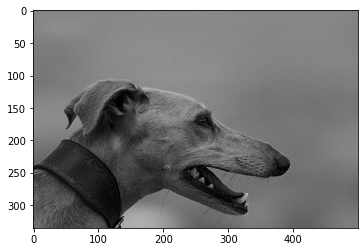

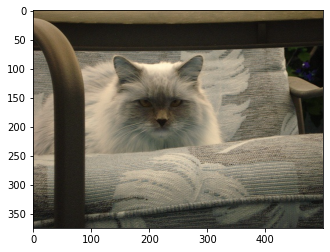

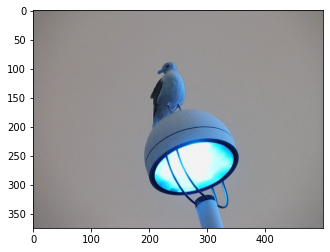

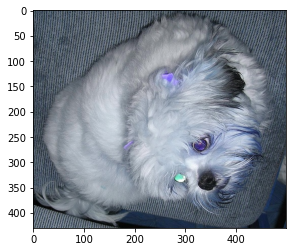

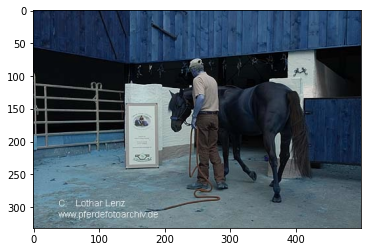

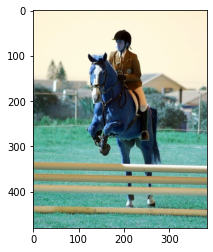

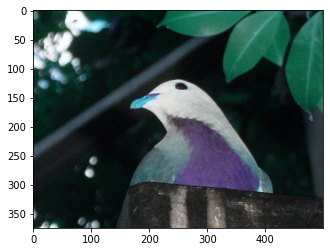

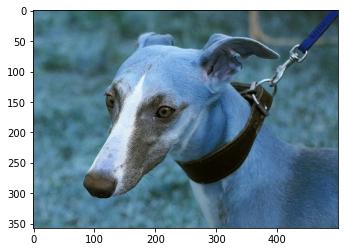

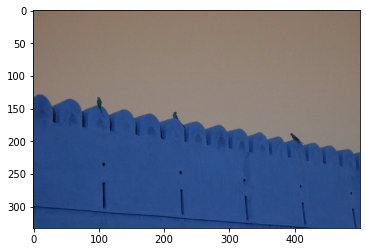

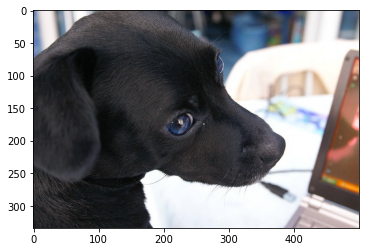

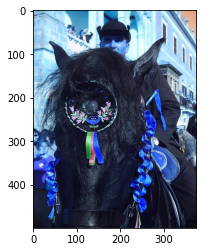

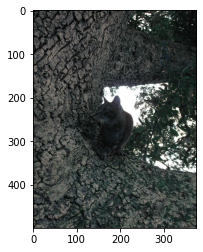

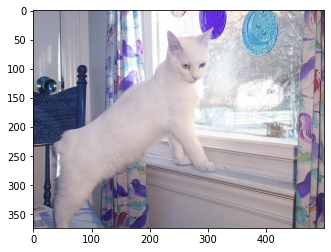

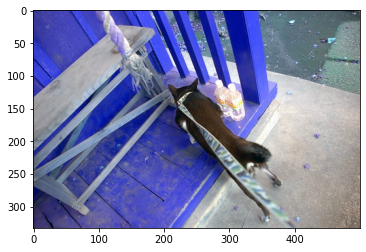

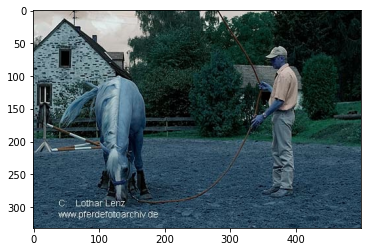

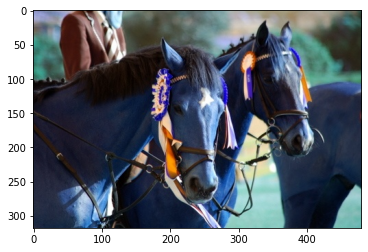

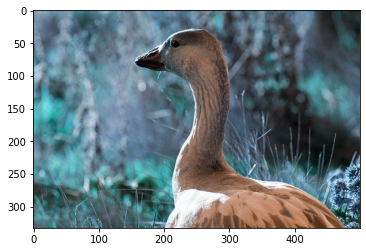

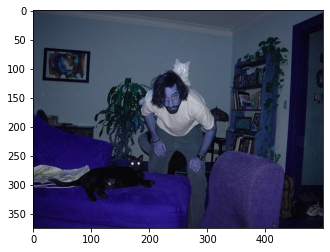

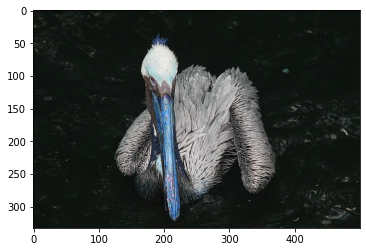

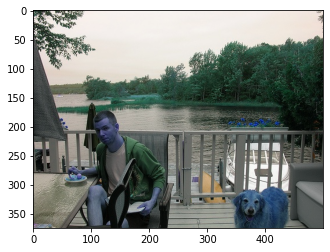

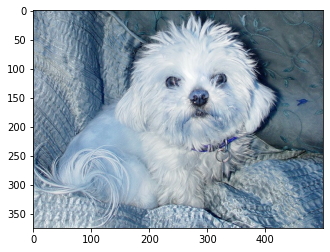

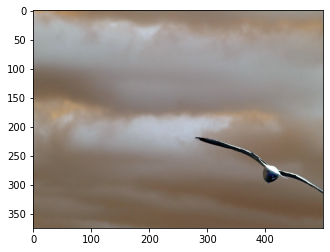

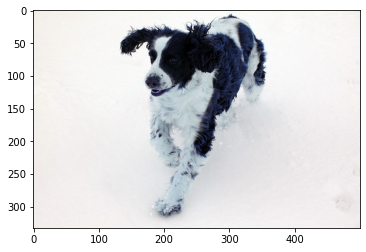

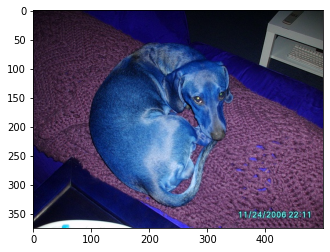

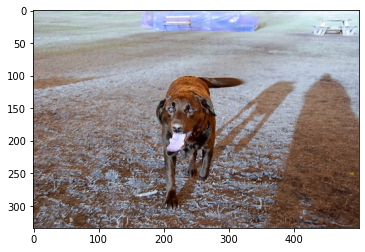

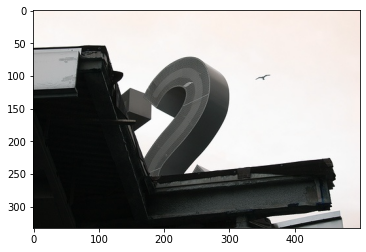

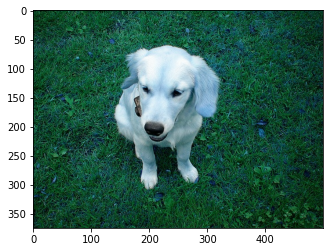

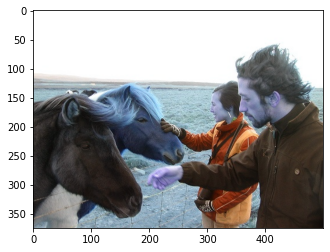

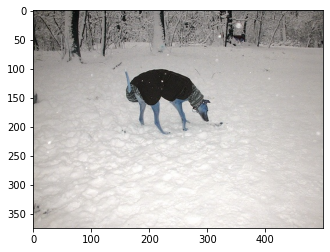

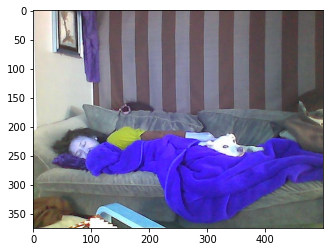

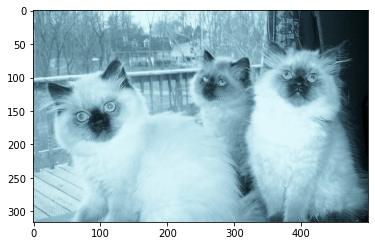

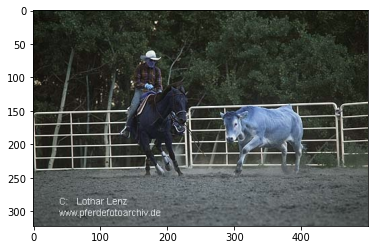

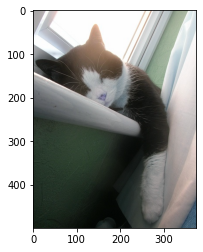

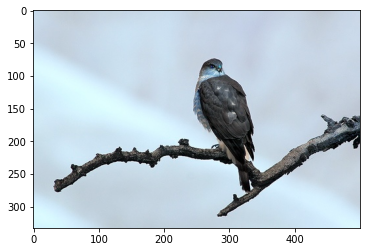

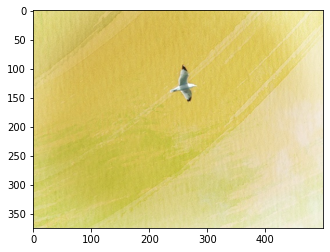

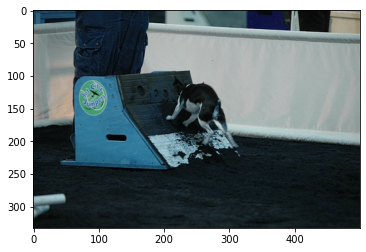

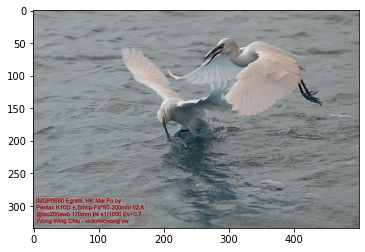

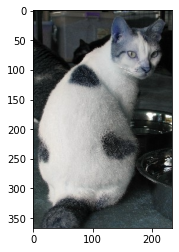

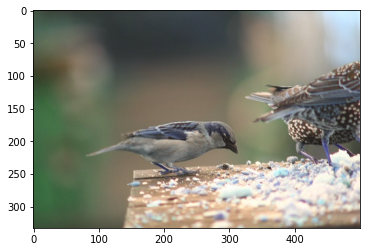

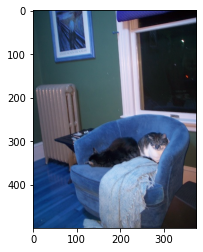

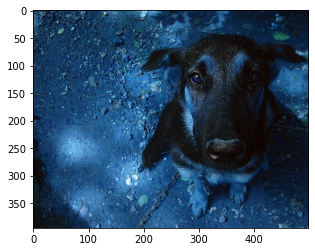

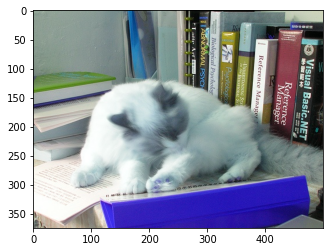

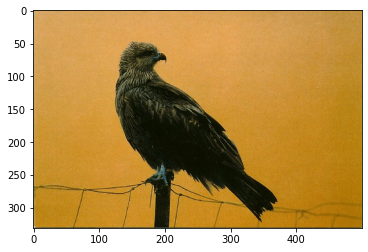

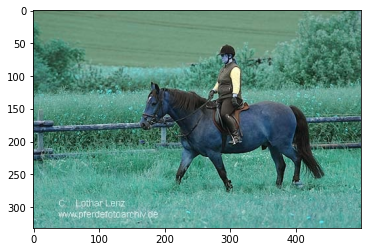

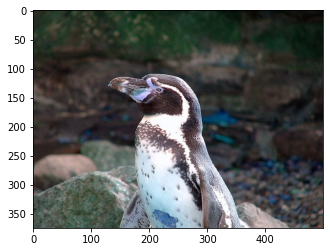

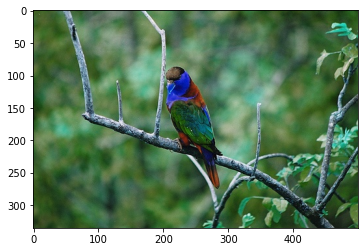

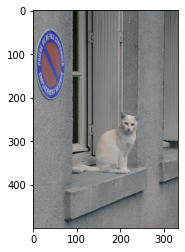

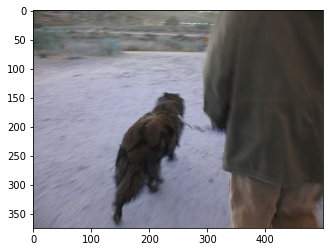

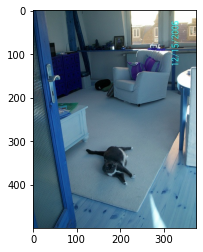

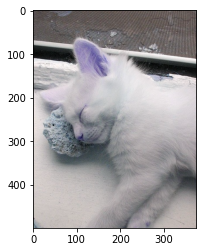

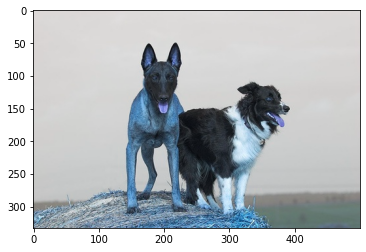

In [ ]:
for images in good_list:
  image = cv2.imread(image_path + images)
  plt.imshow(image)
  plt.show()

The result is not very satisfying, as we are getting too many images. Let's try to use another coefficient of 0.6

In [ ]:
image_final = cv2.imread(image_path + images_annotations[10])
gray = cv2.cvtColor(image_final,cv2.COLOR_BGR2GRAY)
kp1, des1 = sift.detectAndCompute(gray,None) 

In [ ]:
good_list = []
for img in images_annotations:
  image_two = np.array(cv2.imread(image_path + img))
  gray = cv2.cvtColor(image_two,cv2.COLOR_BGR2GRAY)
  kp2, des2 = sift.detectAndCompute(gray,None) 
# BFMatcher with default params
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
  for m,n in matches:
      if m.distance < 0.55*n.distance:
          good_list.append(img)
print(good_list)

['000019.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '000065.jpg', '0000

Here I'm sorting items in the list according to the most appearance, so the best matches are on the top of the list, the least are on the bottom. And I'm also cleaning the data from the repetitions.

In [ ]:
len(good_list)

337

In [ ]:
from collections import Counter
dogs_cat = [item for items, c in Counter(good_list).most_common() for item in [items] * c]
print(dogs_cat)

In [ ]:
print(len(dogs_cat))

337


In [ ]:
dogs_cat = list(dict.fromkeys(dogs_cat))
print(dogs_cat)

['000065.jpg', '001015.jpg', '004902.jpg', '000099.jpg', '001443.jpg', '001490.jpg', '001727.jpg', '004095.jpg', '006428.jpg', '006781.jpg', '007713.jpg', '009516.jpg', '000019.jpg', '000158.jpg', '000246.jpg', '000435.jpg', '000645.jpg', '000690.jpg', '000695.jpg', '000746.jpg', '000796.jpg', '000857.jpg', '000882.jpg', '001127.jpg', '001151.jpg', '001233.jpg', '001395.jpg', '001418.jpg', '001541.jpg', '001778.jpg', '001860.jpg', '001964.jpg', '002043.jpg', '002051.jpg', '002094.jpg', '002218.jpg', '002415.jpg', '002483.jpg', '002571.jpg', '002586.jpg', '003045.jpg', '003085.jpg', '003184.jpg', '003199.jpg', '003210.jpg', '003308.jpg', '003349.jpg', '003377.jpg', '003565.jpg', '003627.jpg', '003915.jpg', '003948.jpg', '004131.jpg', '004347.jpg', '004502.jpg', '004656.jpg', '004792.jpg', '004999.jpg', '005078.jpg', '005371.jpg', '005497.jpg', '005613.jpg', '005728.jpg', '005879.jpg', '005912.jpg', '005983.jpg', '006042.jpg', '006219.jpg', '006470.jpg', '006495.jpg', '006543.jpg', '0065

In [ ]:
print(len(dogs_cat))

104


I'm going to plot only 10 best matches according to the match algorythm.

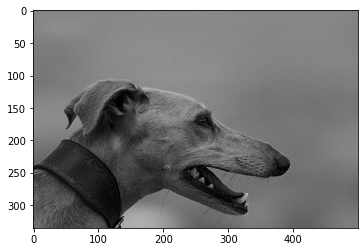

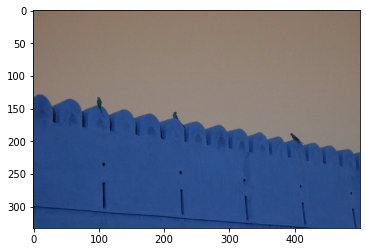

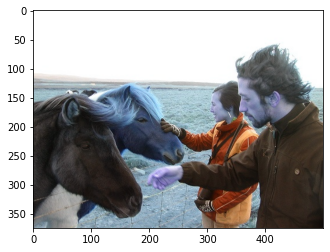

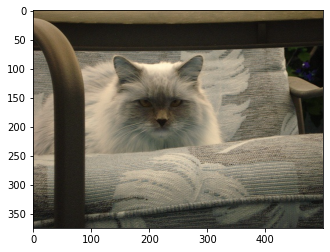

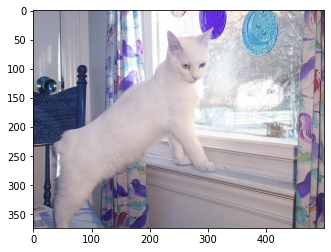

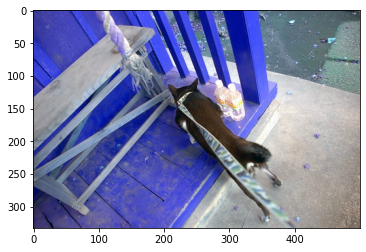

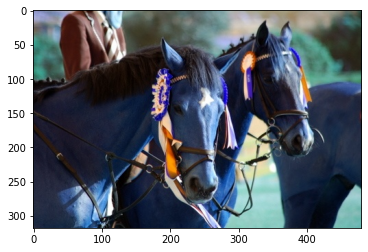

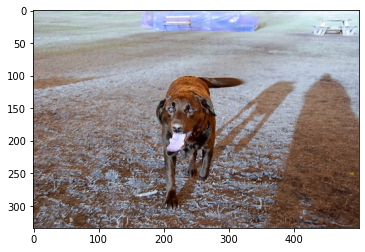

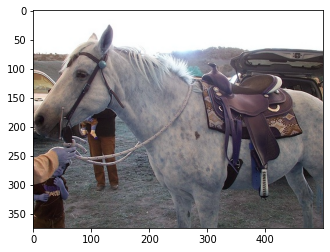

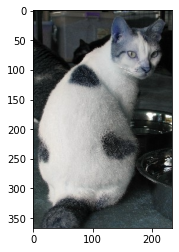

In [ ]:
for images in dogs_cat[0:10]:
  image = cv2.imread(image_path + images)
  plt.imshow(image)
  plt.show()

Apparently, this match method is not good enough to find the images of the same category, especially among the category of animals. However, the best matching image is the original one, so for this task it work more or less fine.

## Second Task: Bag-of-Word model for Image Classification
Keypoint detectors and local invariant descriptors are just the start to building a scalable image search engine.

The problem is that such systems scale linearly, meaning that as more images are added to our system, the longer it will take to perform a search.

For example, if you included a few thousand images in your dataset, search time would slow dramatically because we need to compare our query image to every image in our dataset.

So, what’s the solution?

In practice, to build image search engines that scale to millions of images, we apply the bag of visual words (BOVW) method.

Constructing a BOVW consists of:

1.   Extracting keypoints
2.   Defining local invariant descriptors from your dataset (you should know how to do with the previous project).
3.   Clustering these features to form a codebook/vocabulary using K-means algorithm (to understand it is here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_understanding/py_kmeans_understanding.html#kmeans-clustering-understanding , and for the code it is here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html#kmeans-opencv ).
4.   Quantizing the local invariant descriptors from each image to form a single histogram that represents the visual contents of an image.
5.   Optionally applying tf-idf weighting.
6.   Train a neural network to classify several categories (you may base your model on the example below).


In [ ]:
len(images_annotations)

1341

I'm going to find all the descriptors for all the images. To minimize time, I'm going to use around the half of my dataset, only first 600 images.

In [ ]:
keypoints = np.array([])
descriptors = np.array([])

for img in images_annotations[:600]:
  image_n = np.array(cv2.imread(image_path + img))
  gray = cv2.cvtColor(image_n,cv2.COLOR_BGR2GRAY)
  kp, des = sift.detectAndCompute(gray,None) 
  keypoints = np.append(keypoints, kp)
  descriptors = np.append(descriptors, des)


Reshaping the array to have desc per each image

In [ ]:
desc = np.reshape(descriptors, (len(descriptors)//128, 128))

In [ ]:
desc.shape

(529392, 128)

I'm taking 20 as a cluster number, which is the number from the top of my head. In the best case scenario I could run elbow method to define the number of clusters. Here I'm using the number of 20 as a vocabulary to describe 4 categories with the words. 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, n_init= 5, verbose=1).fit(desc)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 56314415936.429054
start iteration
done sorting
end inner loop
Iteration 1, inertia 54182590561.042595
start iteration
done sorting
end inner loop
Iteration 2, inertia 53459389486.68363
start iteration
done sorting
end inner loop
Iteration 3, inertia 53005125533.30679
start iteration
done sorting
end inner loop
Iteration 4, inertia 52726095138.62036
start iteration
done sorting
end inner loop
Iteration 5, inertia 52573079760.62469
start iteration
done sorting
end inner loop
Iteration 6, inertia 52484301543.4486
start iteration
done sorting
end inner loop
Iteration 7, inertia 52426241102.57207
start iteration
done sorting
end inner loop
Iteration 8, inertia 52383448110.42591
start iteration
done sorting
end inner loop
Iteration 9, inertia 52348692923.085266
start iteration
done sorting
end inner loop
Iteration 10, inertia 52318220411.16682
start iteration
done sorting
end inner loop
Iteration 11, in

Get the prediction for the dog image that was used before

In [ ]:
predicted = kmeans.predict(des1)
print(predicted)

[17  8  4 11  8 18  4 18  8  8  2  4  1  8  6 17 13  6 10 12 10 10 15  6
 15 15 12 17  0 19  2 18  4 16 12 10  4  8 18  4  0  4  8 15 15  8  4 18
  7  3  4  8  8  8 15  8 18 16  6 13  2 15  8 13 13  1  8  9  8  4  2  6
  0  4  8  5  1 13  1 18  2  4 18 16 11  8 16 19 15  0  0  0  1 10  3  0
  0 10  8  0  0 16  1  0  0  8  0  0  0 13  2 13  8  2  2 14  0  8  3  6
 18  1 13 16 14  8  9  9 11 10  9  2 18 13  4  4  4 14 14 14 11 15 17 18
  3  3  8  9 16 11 10  4  8 12 12  4 18  4  9  9 11  0  4  3  4 11  0  4
 16  9 10  0  8 16  8 11 17 18 10 17 18 16 16  9 13  9  2  6  4 11  3  2
  6  2  3  3  3 11 19 19  3 10 11 11 19 19 17 18  2  6  8  4  9 16 16 16
  9  8]


In [ ]:
from collections import Counter

In [ ]:
count = Counter(predicted)
sorted = count.most_common()
sorted.sort()
print(sorted)

[(0, 19), (1, 7), (2, 13), (3, 11), (4, 23), (5, 1), (6, 9), (7, 1), (8, 28), (9, 12), (10, 11), (11, 12), (12, 5), (13, 10), (14, 5), (15, 9), (16, 14), (17, 7), (18, 15), (19, 6)]


20


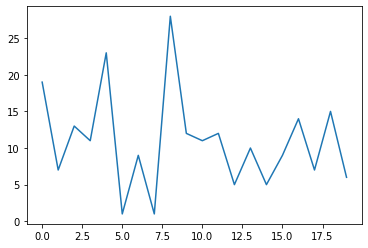

In [ ]:
y_axis = []
for i in range(len(sorted)):
  y_axis.append(sorted[i][1])
plt.plot(y_axis)
print(len(y_axis))

I've noticed that after using counting the pair with some numbers may be missing if it has 0 occurancies. This might lead to the problems in the future, so I'm going to use another technique to find the number of occurancies. Firstly, fill the array with zeros, then replace zeros with the number of occurancies

In [ ]:
word_occur = np.array([])
for img in images_annotations[:600]:
  image_n = np.array(cv2.imread(image_path + img))
  gray = cv2.cvtColor(image_n,cv2.COLOR_BGR2GRAY)
  kp, des = sift.detectAndCompute(gray,None) 
  predicted = kmeans.predict(des)
  sorted = np.zeros([kmeans.n_clusters])
  for pred in predicted:
    sorted[pred] += 1
  word_occur = np.append(word_occur, sorted)

Check that the shape = 600*n_clusters = 12000

In [ ]:
word_occur[:20], word_occur.shape

(array([ 45.,  59.,  77., 132.,  15.,  49.,  98.,  91.,  25., 105.,  67.,
         26.,  26.,  60., 178.,  87.,  95.,  15.,  19.,  17.]), (12000,))

I'm doing reshaping, so to have the list of occurancies per each image

In [ ]:
occur_per_image = np.reshape(word_occur, (len(word_occur)//kmeans.n_clusters, kmeans.n_clusters))
occur_per_image.shape

(600, 20)

Preparing the list of labels in the dataset, which were already stored in annotation_df

In [ ]:
labels = np.array(annotation_df['category'])
labels = labels[:600]
print(labels)

['horse' 'horse' 'cat' 'dog' 'dog' 'cat' 'bird' 'bird' 'dog' 'bird' 'dog'
 'cat' 'dog' 'dog' 'cat' 'bird' 'dog' 'cat' 'dog' 'cat' 'horse' 'dog'
 'bird' 'cat' 'horse' 'bird' 'dog' 'horse' 'bird' 'horse' 'cat' 'horse'
 'cat' 'dog' 'bird' 'cat' 'dog' 'dog' 'horse' 'dog' 'bird' 'horse' 'horse'
 'dog' 'bird' 'horse' 'cat' 'dog' 'bird' 'horse' 'bird' 'cat' 'cat'
 'horse' 'bird' 'cat' 'horse' 'dog' 'dog' 'horse' 'horse' 'cat' 'bird'
 'dog' 'bird' 'cat' 'horse' 'horse' 'cat' 'dog' 'cat' 'cat' 'horse' 'dog'
 'dog' 'bird' 'bird' 'dog' 'dog' 'horse' 'bird' 'bird' 'cat' 'horse' 'dog'
 'horse' 'cat' 'cat' 'bird' 'dog' 'bird' 'dog' 'dog' 'horse' 'horse' 'dog'
 'dog' 'cat' 'bird' 'dog' 'horse' 'dog' 'bird' 'dog' 'dog' 'bird' 'cat'
 'cat' 'horse' 'bird' 'dog' 'dog' 'cat' 'bird' 'dog' 'cat' 'dog' 'bird'
 'dog' 'cat' 'bird' 'dog' 'bird' 'horse' 'cat' 'bird' 'cat' 'dog' 'bird'
 'bird' 'dog' 'cat' 'dog' 'dog' 'bird' 'horse' 'horse' 'bird' 'cat' 'cat'
 'horse' 'dog' 'dog' 'cat' 'dog' 'bird' 'dog' 'dog' 'do

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

Let's assume variable X contains the histograms and variable y contains the classes

In [ ]:
X = occur_per_image
y = labels

I remind that my dataset had originally 4 categories of different animals, and vocabulary size was 20

In [ ]:
ohe = OneHotEncoder()
n_classes = 4 # n_classes depends on the number of categories you chose (shape of one hot encoded y)
vocabulary_size = kmeans.n_clusters # vocabulary_size is the size of your dictionary (n_clusters)

# Convert categorical data to binary array
y = y.reshape(-1, 1)
y = ohe.fit_transform(X=y).toarray()

# Split your data between train and test (you can also do it manually if you want to test one specific image and train with the rest of the dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

The result is a binary array that has 1 for the right category of image

In [ ]:
print(y.shape), y[0]

(600, 4)


(None, array([0., 0., 0., 1.]))

In [ ]:
# Design the model (you can play with layer size and add/remove layers if you want to improve it)
model = Sequential()
model.add(Dense(64, input_dim=vocabulary_size, activation='relu')) 
model.add(Dense(16, activation='relu'))
model.add(Dense(n_classes, activation='softmax')) 

# Compile the model (again, you can change loss, optimizer and metrics if you think you can improve it)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (use GPU on Google Colab!) - if you have enough data, try to add validation data
model.fit(X_train, y_train, epochs=100, batch_size=64) # epochs and batch_size will depend on the amount of data and the complexity of your model, don't hesitate to change it

# Test the model
y_pred = model.predict(X_test)
a = accuracy_score(np.argmax(y_pred, axis=-1), np.argmax(y_test, axis=-1))
print(f'Accuracy is: {a * 100}')

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 18.9443 - accuracy: 0.2144
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 5.0945 - accuracy: 0.2920
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 3.0825 - accuracy: 0.3269
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 2.3426 - accuracy: 0.3378
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 2.2058 - accuracy: 0.3652
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 1.8315 - accuracy: 0.3687
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 1.8167 - accuracy: 0.3392
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 1.5099 - accuracy: 0.3418
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 1.4830 - accuracy: 0.3112
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 1.3920 - accuracy: 0.3546
Epoch 11/100
9/9 [==========

As a result, the Accuracy is: 30.0 which is a bit higher than the random 25%

To improve, I would increase the dataset and experiment with different vocabulary sizes. 

## Third Task: Using Convolutional Neural Network to represent Images
Using pre-trained Deep Networks as new image representation technique.

We can now compare the above approaches to an approach where we represent the images with Deep Representation.

First we need to load a pre-trained network since we do not want to train a network from scratch: We will load a VGG model without the top layers (which consists of fully connected layers).

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Activation
from keras.optimizers import SGD

# Load the VGG model
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze the layers except the last 4 layers
for layer in model.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f41d49e5dd8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f41d49ef198> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f41d49efd30> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f41d49f4240> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f41d49f0748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f41d49fc748> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f41d4984ef0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f41d49fc4e0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f41d4986dd8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f41d4993e80> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f41d4998048> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In our case, we freeze all the layers.

The result should then be a tensor of size 7x7x512 , which is 512 feature maps of size 7-by-7.

We then flatten this tensor and trained two dense layers followed by a softmax layer 

In [ ]:
model.summary() 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

We are trying to lower the amount of units from 25088 to 4, so as a middle number for Dense layers I'm taking 5000.

I tried to add the Dense(25088), but I always faced the error related to the ResourceExhaustedError. Unfortunately I'm not familiar with tensorflow that well to understand how to allocate more resources or do it in a better way. 

In [ ]:
flatten=Flatten()(model.output)
prediction=Dense(25088,activation='relu')(flatten)
new_model=Model(inputs=model.input,outputs=prediction)

ResourceExhaustedError: ignored

In [ ]:
flatten=Flatten()(model.output)
outputs=(model.output)
prediction=Dense(5000,activation='relu')(outputs)
new_model=Model(inputs=model.input,outputs=prediction)

In [ ]:
dense=(new_model.output)
prediction=Dense(20,activation='softmax')(dense)
new_model=Model(inputs=new_model.input,outputs=prediction)

In [ ]:
new_model.summary() 

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

I'm chosing loss: I was thinking to choose square error, but in the lectures is said "When using softmax output layer, choose cross entropy". So I'll just try with cross entropy and see how it goes. I tried it and the results were much worse. So I changed it to square error.

In [ ]:
new_model.compile(loss='mse', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

I already have labels as a needed array. What I need to prepare is the array of images.

In [ ]:
data = []
for img in images_annotations[0:600]:
  img_to_resize = cv2.imread(image_path + img)
  res = cv2.resize(img_to_resize, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  data.append(res)
data = np.array(data)
print(data.shape)

(600, 224, 224, 3)


In [ ]:
X = data

In [ ]:
# Split your data between train and test (you can also do it manually if you want to test one specific image and train with the rest of the dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

This lines should solve some error related to TensorFlow.

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

I tried to solve this problem, but seems like it's a limitation of the resources. That is also the reason why I was not abble to add the second dense layer:

```
Dense(25088,activation='relu')
```
And yes, I tried the soluctions from Stackoverflow https://stackoverflow.com/questions/59394947/how-to-fix-resourceexhaustederror-oom-when-allocating-tensor/59395251


In [ ]:
new_model.fit(X_train, y_train, 100, 20)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/20


ResourceExhaustedError: ignored

In [ ]:
y_pred = new_model.predict(X_test)
a = accuracy_score(np.argmax(y_pred, axis=-1), np.argmax(y_test, axis=-1))
print(f'Accuracy is: {a * 100}')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Accuracy is: 16.666666666666664


There is ofc some kind of error, as my prediction is less than a random one.